# 1.2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
pd.__version__

'0.25.1'

Если вы увидели warning, не переживайте, всё хорошо. 
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [3]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Часть 1 (13 баллов)

1) Выведите последние 10 элеметнов датасета (1 балл)

In [3]:
df.tail(100)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32461,24,Private,284317,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,32,United-States,<=50K
32462,48,Self-emp-inc,185041,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,50,United-States,>50K
32463,58,Local-gov,223214,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
32464,45,Self-emp-inc,173664,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
32465,66,Private,269665,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,25,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2) Сколько колонок и сколько строк в этом датасете? (1 балл)

In [4]:
df.shape

(32561, 15)

3) Какие типы данных у элементов этого датасета? (1 балл)

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски? (1 балл)

In [6]:
df.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже. (3 балла)

Ваш ответ:  Возможно, не все из опрашиваемых знали. что писать в эти ячейки. К примеру, человек мог не знать, в какой стране он родился, или к какому классу он принадлежит.

6) Какие и сколько различных рабочих классов workclass представлено в выборке? (2 балла)

In [7]:
df.drop_duplicates(subset="workclass")["workclass"].values, len(df.drop_duplicates(subset="workclass")["workclass"].values)

(array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object), 9)

7) Какой средний возраст женщин и мужчин? (1 балл)

In [8]:
print("Female avg age: {}\nMale avg age: {}".format(
    df[df['sex'] == " Female"]['age'].mean(),
    df[df['sex'] == " Male"]['age'].mean()
))

Female avg age: 36.85823043357163
Male avg age: 39.43354749885268


8) Постройте гистограмму(bar) распределения образования людей (education) (2 балла)

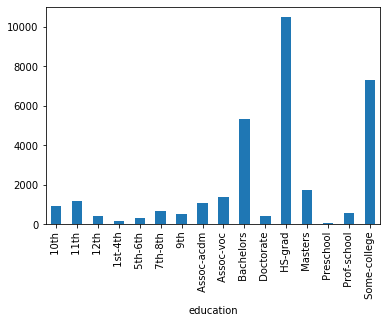

In [7]:
df.groupby('education').count()["age"].plot(kind='bar')

## Часть 2 (18 баллов)

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год? (2 балла)

In [8]:
print("For rich: " + str((df[df["income"] == " >50K"]["age"].mean(),df[df["income"] == " >50K"]["age"].std())))
print("For not so rich: " + str((df[df["income"] == " <=50K"]["age"].mean(),df[df["income"] == " <=50K"]["age"].std())))

For rich: (44.24984058155847, 10.519027719851826)
For not so rich: (36.78373786407767, 14.02008849082488)


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate) (2 балла)

In [27]:
ed = df[df["income"] == " >50K"]["education"]
mask = (ed != " Bachelors") & (ed != " Prof-school") & (ed != " Assoc-acdm") & (ed != " Assoc-voc") & (ed != " Masters") & (ed != " Doctorate")
len(ed[mask]) == 0

False

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми. (2 балла)

In [47]:
mask = (df["marital.status"] == " Married-civ-spouse") | (df["marital.status"] == " Married-spouse-absent") | (df["marital.status"] == " Married-AF-spouse") 
married = df[mask][(df["income"] == " >50K") & (df["sex"] == " Male")]["income"].count() / df[mask]["income"].count()
unmarried = df[~mask][(df["income"] == " >50K") & (df["sex"] == " Male")]["income"].count() / df[~mask]["income"].count()
if(married > unmarried):
    print("Married")
elif(married < umnarried):
    print("Unmarried")
else:
    print("Draw")

Married


/home/dmitry/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/dmitry/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country). (3 балла)

In [34]:
poor = df[df['income'] == " <=50K"].groupby('native.country')['hours.per.week'].mean()
rich = df[df['income'] == " >50K"].groupby('native.country')['hours.per.week'].mean()
print(poor)
print()
print(rich)

native.country
 Cambodia                      41.416667
 Canada                        37.914634
 China                         37.381818
 Columbia                      38.684211
 Cuba                          37.985714
 Dominican-Republic            42.338235
 Ecuador                       38.041667
 El-Salvador                   36.030928
 England                       40.483333
 France                        41.058824
 Germany                       39.139785
 Greece                        41.809524
 Guatemala                     39.360656
 Haiti                         36.325000
 Holand-Netherlands            40.000000
 Honduras                      34.333333
 Hong                          39.142857
 Hungary                       31.300000
 India                         38.233333
 Iran                          41.440000
 Ireland                       40.947368
 Italy                         39.625000
 Jamaica                       38.239437
 Japan                         41.000000
 

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам. (4 балла)

In [15]:
pd.crosstab(df['education'], np.round(np.power(df['capital.gain'] - df['capital.loss'], 0.22), 0))

col_0,0.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,13.0
education,,,,,,,,,,
10th,865,1,1,9,19,5,1,1,1,2
11th,1089,0,5,8,19,17,4,0,0,0
12th,403,0,3,4,7,5,2,1,0,0
1st-4th,159,0,0,1,3,1,0,0,0,0
5th-6th,308,0,0,3,6,5,0,0,0,0
7th-8th,582,0,0,8,25,7,1,0,0,0
9th,474,2,2,9,15,2,0,0,0,1
Assoc-acdm,930,0,0,9,24,30,16,2,0,1
Assoc-voc,1194,0,2,8,53,49,18,2,1,1


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще. (2 балла)

' Iran'

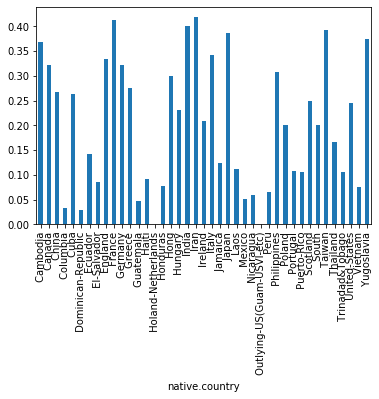

In [20]:
table = df[df['income'] == " >50K"].groupby('native.country').count()['age'] / df.groupby('native.country').count()['age']
table.plot(kind='bar')
table.idxmax()

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary (3 балла)

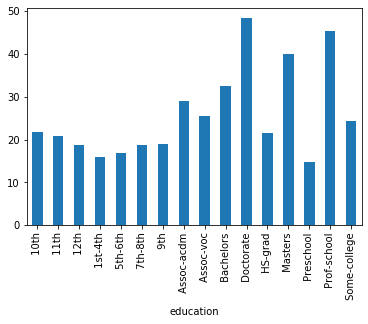

In [91]:
df2 = df.copy()
size = len(df2)
df2['magic_income'] = np.where(df2['income']==" <=50K", np.random.uniform(0, 50, size), np.random.uniform(50, 200, size))
weeks_per_year = 52.1429
df2['income_per_hour'] = df2['magic_income'] / df2['hours.per.week'] * 1000 / weeks_per_year
df2.groupby('education')['income_per_hour'].mean().plot(kind='bar')